Pikachu classified! Width: 25cm. Height: 36cm 
Nearest Pikachu points:
[1.1830675156345303, 1.42589352591132, 1.627446194544757, 1.8272493974513997, 1.8302261952383383] 
Nearest Pichu points:
[2.999018334307467, 3.5173117776523264, 4.68603712494074, 5.02492048464666, 5.080809876493408]


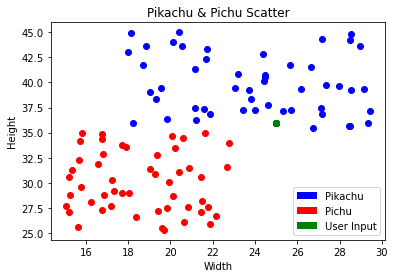

In [370]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import re

pichudata = []
pikachudata = []
test_points = []
path = 'files/pichu.txt'
path2 = 'files/pikachu.txt'
path3 = 'files/test_points.txt' # variable paths for easier additions
distance_list = list() 
distance_list2 = list()

def calculateDistance(xi,yi,x2,y2):
    dist = math.sqrt((x2-xi)**2 + (y2-yi)**2) # calculates the distance from entered point to all points in pikachu data
    distance_list.append(dist)
    return dist
def calculateDistancepichu(xi,yi,x2,y2):
    dist1 = math.sqrt((x2-xi)**2 + (y2-yi)**2) # calculates the distance from entered point to all points in Pichu data
    distance_list2.append(dist1) #Appends to pichu coordinate list
    return dist1

with open(path, 'r') as f1, open(path2, 'r') as f2, open(path3, 'r') as f3: 
    testdata = f3.read()
    next(f1)
    for line in f1:
       pichudata.append([eval(n) for n in line[1:-2].split(',')]) # cleans the file and appends to pichu data
    next(f2) 
    for line in f2:
        pikachudata.append([eval(n) for n in line[1:-2].split(',')])  # cleans the file and appends to pikachu data

testers = (re.sub('[(,)]', '', testdata)) # cleans testing file
test_points = [x for i in testers for x in i.split()] # takes number values from testers and makes each get an index in test_points list
# Did not know how to iterate test_points through algo 

# ------------
classes = ['Pikachu', 'Pichu', 'User Input']
class_colors = ['b', 'r', 'g']
recs = []
for i in range(0,len(class_colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colors[i]))
# ------------ Taken from stackoverflow, creates lists to hold data for legend, used it to show different colors in legend. 
try:
  u_x = int(input("Please enter the width:")) # error handling incase wrong data-type entered
  u_y = int(input("Please enter the height:"))
except ValueError:
    print("\nPlease only enter whole nubmers.")

for pair in pikachudata:
    x2,y2 = pair[0],pair[1] # since list is split in two rows we have to separate the numbers
    calculateDistance(x2,y2, u_x,u_y) #using function to calc distance, user input variables included 
    plt.scatter(x2,y2, color="b")
for pair in pichudata:
        x,y = pair[0],pair[1]
        calculateDistancepichu(x,y, u_x,u_y)
        plt.scatter(x,y, color="r", label='Pichu')
        plt.xlabel('Width')
        plt.ylabel('Height')
        plt.title('Pikachu & Pichu Scatter')
        plt.scatter(u_x,u_y, color="g") # plotting user input for reference
        plt.legend(recs,classes,loc=4)
        plt.show        

distance_list2.sort() # sorting the lists so the answer goes from low to high to display nearest points. 
distance_list.sort()

if distance_list2[:5] <= distance_list[:5]: # [:5] slice to compare with the nearest 5 results. 
    print(f"Pichu classified! Width: {u_x}cm. Height: {u_y}cm \nNearest Pikachu points:\n{distance_list[:5]} \nNearest Pichu points:\n{distance_list2[:5]}")
else:
    print(f"Pikachu classified! Width: {u_x}cm. Height: {u_y}cm \nNearest Pikachu points:\n{distance_list[:5]} \nNearest Pichu points:\n{distance_list2[:5]}")
